<a href="https://colab.research.google.com/github/jhonnyribeiro/data-science-introduction/blob/main/desafio_modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **O impacto da COVID-19 no sistema de saúde - Internações, óbitos e custo por habitante no periodo pré e durante pandemia**

  Segundo análises cientificas, estima-se que em novembro de 2019 surgia um virus, mais especificamente na cidade de Wuhan, na China que nos meses seguintes mudaria os rumos da saúde e da ciência mundial. Em janeiro de 2020, após a divulgação do aumento do numero de casos e a entrada da cidade em isolamento, o virus começou a espalhar-se rapidamente, colocando a prova o sistema de saude de paises, sejam eles desenvolvidos ou emergentes.
  Esse estudo tem por objetivo o levantamento e análise dos dados referentes ao numero de internações e óbitos registrados pelo sistema de saúde brasileiro no periodo pré(2019) e durante(2020-2021) da pandemia de COVID-19, com ênfase para o estado do Espirito Santo, na região sudeste do país. Em complementação, um comparativo financeiro referente ao valor dos gastos por habitante entre esses periodos também será apresentado.  



## **1. Internações**




Os dados a seguir representam o comparativo entre numero de internações registrados pelo governo em números totais e os classificados como COVID-19.

**1.1 Total de internações - Região Sudeste**




In [66]:
# IMPORTS 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [67]:
#Tabela regiao sudeste

internacao_geral = pd.read_csv("/content/INTERNACOES_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211105_GERAL.CSV", encoding="ISO-8859-1", sep=";", skiprows=4, skipfooter=12)
internacao_geral = internacao_geral.replace("-", 0)
internacao_geral = internacao_geral.replace("1", 1)
internacao_geral = internacao_geral.drop("Total", axis=1)
internacao_geral = internacao_geral.set_index("Unidade da Federação")
meses_analise = internacao_geral.columns[144:174]
internacao_geral = internacao_geral[meses_analise] 
internacao_geral["Total"] = internacao_geral.sum(axis=1)
internacao_geral = internacao_geral.sort_values("Total", ascending=False)
internacao_geral = internacao_geral.drop("Total", axis=1)
internacao_geral

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,208950,196975,210496,217520,225473,207872,214099,216034,211709,220858,203475,194316,212127,197764,193003,144854,162855,169301,182324,184213,188640,194513,192155,184589,190961,180084,195597,162946,177389,165197
31 Minas Gerais,103677,97752,105283,110778,115484,105842,111252,108185,106752,109789,102940,101008,105174,98203,96611,76977,84366,85878,91580,92116,93796,96321,96114,94675,96405,90483,105659,96104,102548,90589
33 Rio de Janeiro,60726,56487,59816,61194,65012,60559,64086,63308,61608,63039,58196,55693,59864,54479,54250,45289,50006,50022,54719,57111,56840,56301,56446,56088,59070,53262,66715,61677,63644,55825
32 Espírito Santo,19712,19457,20873,20786,22009,20339,21868,21615,21152,21968,19963,20045,20955,20485,20262,15597,16501,16518,18438,17879,18385,19050,19924,20951,20495,19393,23303,20472,22473,19900


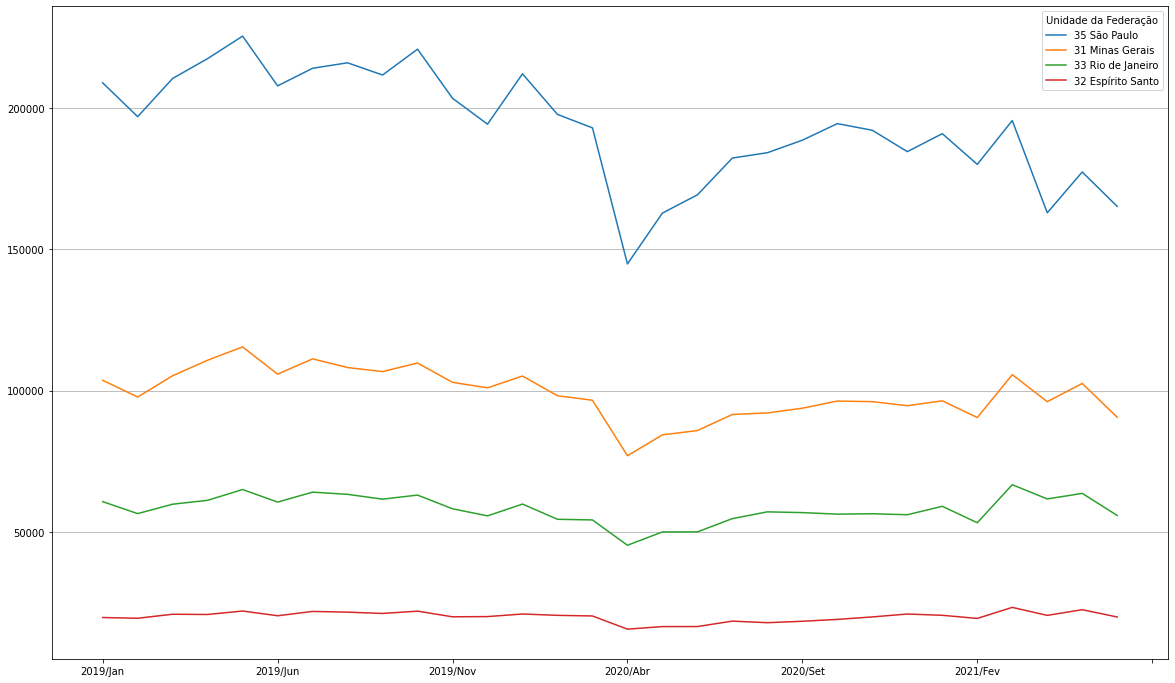

In [68]:
#Grafico Região Sudeste
internacao_geral.T.plot(figsize=(20,12))
plt.grid(axis="y")

**1.2 Total de internações - Espirito Santo**

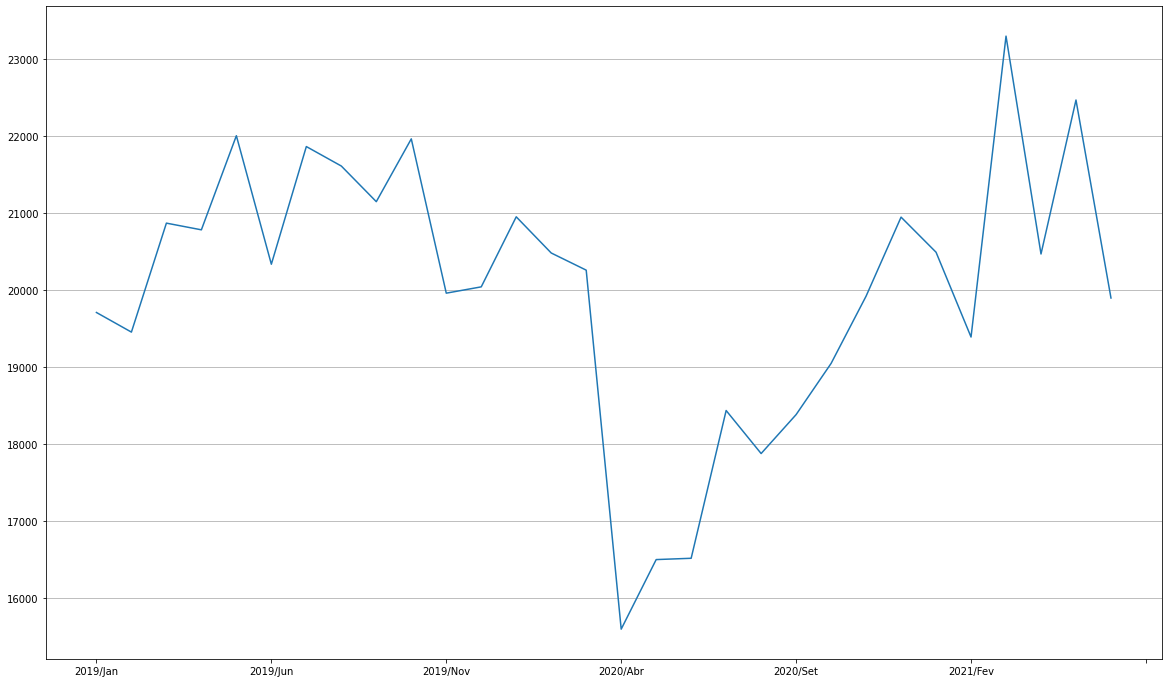

In [69]:
#Grafico Espirito Santo
internacao_geral.T['32 Espírito Santo'].plot(figsize=(20,12))
plt.grid(axis="y")

### Só o  cOVID


In [70]:
#Tabela regiao sudeste

internacao_covid = pd.read_csv("/content/INTERNACOES_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211105_COVID19.CSV", encoding="ISO-8859-1", sep=";", skiprows=5, skipfooter=12)
internacao_covid = internacao_covid.replace("-", 0)
internacao_covid = internacao_covid.replace("1", 1)
internacao_covid = internacao_covid.drop("Total", axis=1)
internacao_covid = internacao_covid.set_index("Unidade da Federação")
meses_analise = internacao_covid.columns[:-2]
internacao_covid = internacao_covid[meses_analise] 
internacao_covid["Total"] = internacao_covid.sum(axis=1)
internacao_covid = internacao_covid.sort_values("Total", ascending=False)
internacao_covid = internacao_covid.drop("Total", axis=1)
internacao_covid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,1,113,7861,16899,19044,20726,16061,11219,8392,9178,14433,18729,18909,41113,33153,34197,31324
31 Minas Gerais,0,14,311,1189,4002,7120,6434,5375,3982,4133,7708,10186,9593,23306,21105,20257,16821
33 Rio de Janeiro,0,52,3425,7447,4755,4373,4114,3780,3407,5510,7994,6271,3924,10852,12683,10685,6348
32 Espírito Santo,0,7,310,1445,2335,2212,1407,988,887,1357,2278,1999,1556,3767,4339,2944,1627


In [71]:
# fatia internação geral
meses_analise = internacao_geral.columns[-17:]
internacao_geral = internacao_geral[meses_analise]
internacao_geral

,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,197764,193003,144854,162855,169301,182324,184213,188640,194513,192155,184589,190961,180084,195597,162946,177389,165197
31 Minas Gerais,98203,96611,76977,84366,85878,91580,92116,93796,96321,96114,94675,96405,90483,105659,96104,102548,90589
33 Rio de Janeiro,54479,54250,45289,50006,50022,54719,57111,56840,56301,56446,56088,59070,53262,66715,61677,63644,55825
32 Espírito Santo,20485,20262,15597,16501,16518,18438,17879,18385,19050,19924,20951,20495,19393,23303,20472,22473,19900


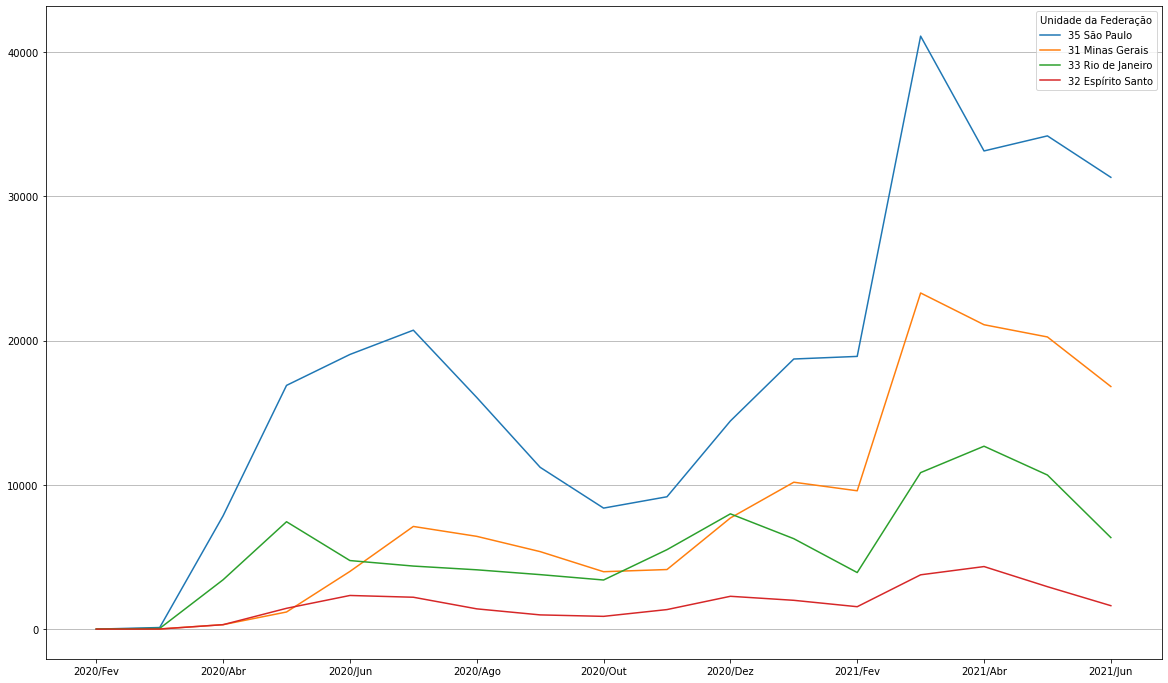

In [72]:
#Grafico Região Sudeste
internacao_covid.T.plot(figsize=(20,12))
plt.grid(axis="y")

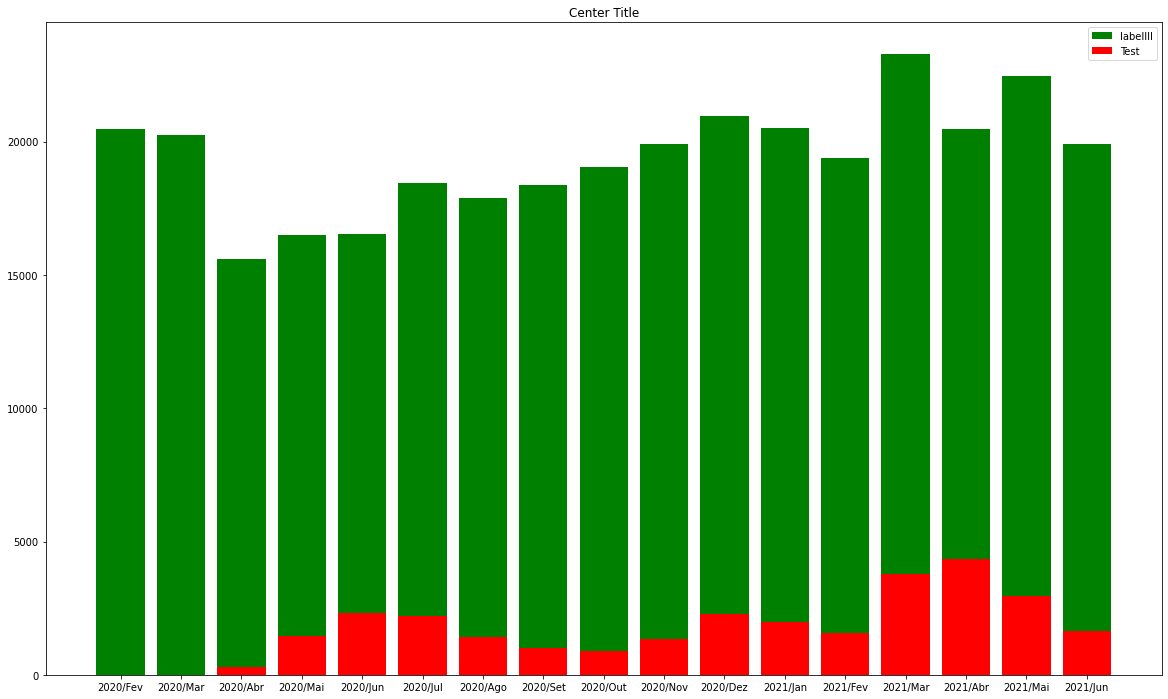

In [73]:
#grafico espirito santo

# ax = internacao_covid.loc["32 Espírito Santo"].T.plot(figsize=(20,12), label = 'Internações Covid',)
# internacao_geral.loc["32 Espírito Santo"].T.plot(figsize=(20,12),ax=ax,label = 'Internações Totais')
# plt.legend()
# plt.grid(axis="y")


internacao_covid = internacao_covid.loc['32 Espírito Santo']
internacao_geral = internacao_geral.loc['32 Espírito Santo']

plt.figure(figsize=(20,12))

plt.title('Center Title')
plt.bar(internacao_geral.index, internacao_geral.values, label='labellll', color='g')
plt.bar(internacao_covid.index, internacao_covid.values, label='Test', color='red')
plt.legend()
plt.show()


**1.3 Análise dos dados**

## **2. Óbitos**

Os dados a seguir representam o comparativo entre numero de óbitos registrados pelo governo em números totais e os classificados como COVID-19.

**1.1 Total de óbitos - Região Sudeste**

In [74]:
#Tabela regiao sudeste

obitos_geral = pd.read_csv("/content/OBITOS_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211106_GERAL.CSV", encoding="ISO-8859-1", sep=";", skiprows=4, skipfooter=12)
obitos_geral = obitos_geral.replace("-", 0)
obitos_geral = obitos_geral.replace("1", 1)
obitos_geral = obitos_geral.drop("Total", axis=1)
obitos_geral = obitos_geral.set_index("Unidade da Federação")
meses_analise = obitos_geral.columns[165:182]
obitos_geral = obitos_geral[meses_analise] 
obitos_geral["Total"] = obitos_geral.sum(axis=1)
obitos_geral = obitos_geral.sort_values("Total", ascending=False)
obitos_geral = obitos_geral.drop("Total", axis=1)

obitos_geral

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,9687,10889,11726,13762,13748,14543,13731,12263,12121,11381,12546,14150,13296,21300,17386,17343,15566
31 Minas Gerais,4438,4746,4213,4839,5318,6139,6277,5815,5757,5167,5999,6939,6294,10684,9228,8427,6820
33 Rio de Janeiro,3663,3918,5291,6527,5075,5124,5237,4898,4702,5273,6129,5684,4608,7473,7929,6712,4993
32 Espírito Santo,688,782,828,1202,1284,1276,1140,948,1030,1117,1434,1193,1098,1794,1889,1426,1020


In [75]:
obitos_covid = pd.read_csv("/content/OBITOS_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211106_COVID19.CSV", encoding="ISO-8859-1", sep=";", skiprows=5, skipfooter=12)
obitos_covid = obitos_covid.replace("-", 0)
obitos_covid = obitos_covid.replace("1", 1)
obitos_covid = obitos_covid.drop("Total", axis=1)
obitos_covid = obitos_covid.set_index("Unidade da Federação")
meses_analise = obitos_covid.columns[:17]
obitos_covid = obitos_covid[meses_analise] 
obitos_covid["Total"] = obitos_covid.sum(axis=1)
obitos_covid = obitos_covid.sort_values("Total", ascending=False)
obitos_covid = obitos_covid.drop("Total", axis=1)
obitos_covid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,1,39,2105,3854,4267,4541,3459,2338,1610,1778,2871,4108,4285,11984,8934,8148,6893
31 Minas Gerais,0,5,63,236,858,1535,1361,1120,785,686,1478,2117,2055,6004,4898,3876,2791
33 Rio de Janeiro,0,14,1250,2519,1230,1113,1048,921,882,1395,2295,1699,1078,3576,4121,3035,1638
32 Espírito Santo,0,1,70,390,552,438,291,179,158,309,512,406,311,907,1076,523,220


In [76]:
#Grafico regiao Sudeste apenas es



**1.2 Total de óbitos - Espirito Santo**

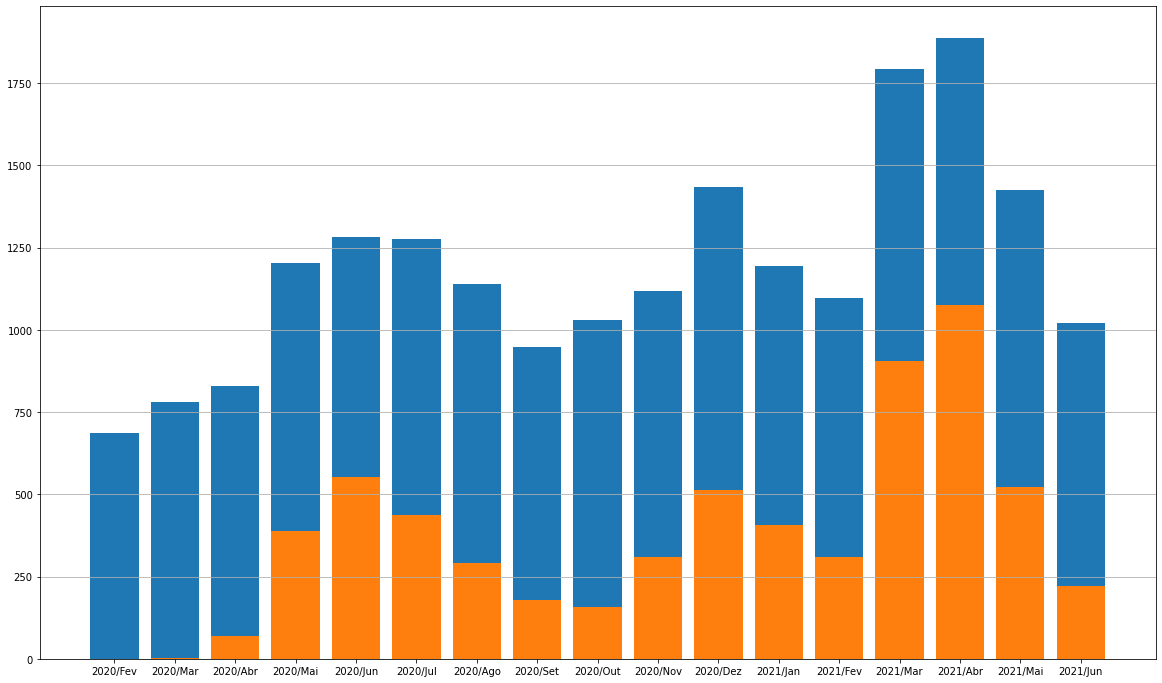

In [77]:
#grafico espirito santo

# ax = obitos_covid.loc["32 Espírito Santo"].T.plot(figsize=(20,12))
# obitos_geral.loc["32 Espírito Santo"].T.plot(figsize=(20,12),ax=ax);
obitos_covid = obitos_covid.loc['32 Espírito Santo']
obitos_geral = obitos_geral.loc['32 Espírito Santo']

plt.figure(figsize=(20,12))

plt.bar(obitos_geral.index, obitos_geral.values, label='labellll')
plt.bar(obitos_covid.index, obitos_covid.values, label='Test')

plt.grid(axis="y")


**1.3 Análise dos dados**

## **3. Custo por habitante - Espírito Santo**

Comparativo entre o valor gasto por habitante entre 2019-2021

In [78]:
#Tabela Espirito Santo

custo_geral = pd.read_csv("/content/CUSTO_MEDIO_INTERNACAO_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211110_GERAL.CSV", encoding="ISO-8859-1", sep=";", skiprows=4, skipfooter=12, thousands =".",decimal=",")
pd.options.display.float_format = "{:.2f}".format
custo_geral = custo_geral.replace("-", 0)
custo_geral = custo_geral.drop("Total", axis=1)
custo_geral = custo_geral.set_index("Unidade da Federação")
meses_analise = custo_geral.columns[145:174]
custo_geral = custo_geral[meses_analise] 
custo_geral["Total"] = custo_geral.sum(axis=1)
custo_geral = custo_geral.sort_values("Total", ascending=False)
custo_geral = custo_geral.drop("Total", axis=1)
custo_geral

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,1460.01,1443.76,1425.91,1417.48,1456.99,1499.54,1496.50,1475.06,1513.83,1478.42,1509.84,1505.10,1440.60,1529.84,1656.09,1692.16,1832.48,1941.59,1978.06,1939.38,1829.77,1811.93,1938.19,2023.85,2055.00,2489.71,2631.78,2630.19,2523.99
35 São Paulo,1362.65,1369.91,1347.34,1371.63,1355.49,1436.40,1408.94,1390.42,1377.30,1390.83,1408.84,1436.75,1376.95,1441.55,1762.95,1931.08,1940.55,1987.95,1906.40,1801.84,1695.62,1710.15,1832.17,1889.73,1942.47,2458.07,2755.60,2722.45,2601.73
32 Espírito Santo,1269.99,1281.12,1250.04,1303.60,1275.23,1305.58,1356.44,1301.02,1356.01,1317.14,1259.71,1317.85,1298.58,1317.24,1538.95,1775.09,1935.64,2274.34,2036.20,1893.97,1850.38,1825.23,2016.93,1984.14,2038.36,2471.63,2831.37,2524.78,2240.21
33 Rio de Janeiro,1318.21,1256.68,1258.44,1273.91,1305.01,1378.17,1324.32,1326.76,1313.04,1287.48,1352.62,1348.34,1345.81,1378.17,1535.38,1795.75,1765.50,1759.98,1578.01,1448.44,1450.14,1486.80,1724.99,1749.31,1640.68,1880.57,2147.40,2257.52,2090.04


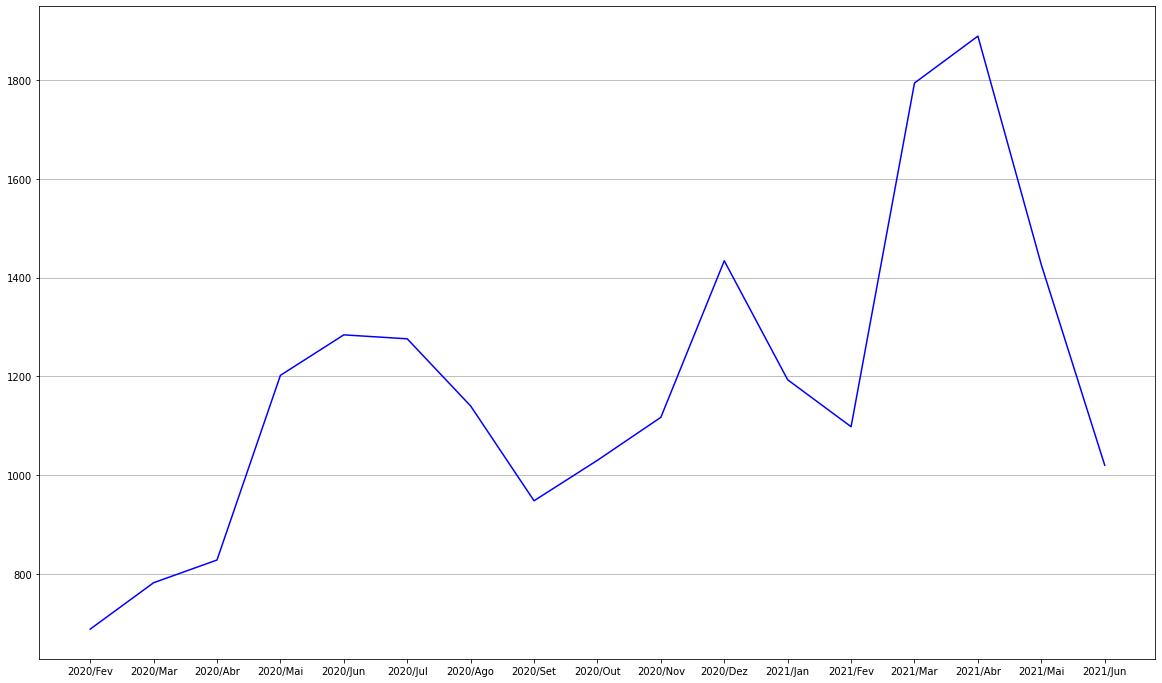

In [124]:
plt.figure(figsize=(20,12))
ax = plt.plot(obitos_geral.index, obitos_geral.values, c="blue")
plt.grid(axis='y')
plt.show()

**3.1 Análise dos dados**

## **4. Conclusões**